# Notebook 5 — Solutions: Optimization for Machine Learning

This notebook contains the worked-out solutions for the exercises in **Notebook 5**.

## Exercise Solution — Implementing SGD for Linear Regression

**Goal:** Learn how to implement Stochastic Gradient Descent (SGD) from scratch for a simple linear regression problem.

### Key Steps:
1. Initialize weights randomly.
2. Loop over epochs.
3. Shuffle the training data.
4. For each sample, compute prediction, loss, gradient, and update weights.
5. Track loss over time.

Learned parameters: w = 2.5539, b = 4.0824


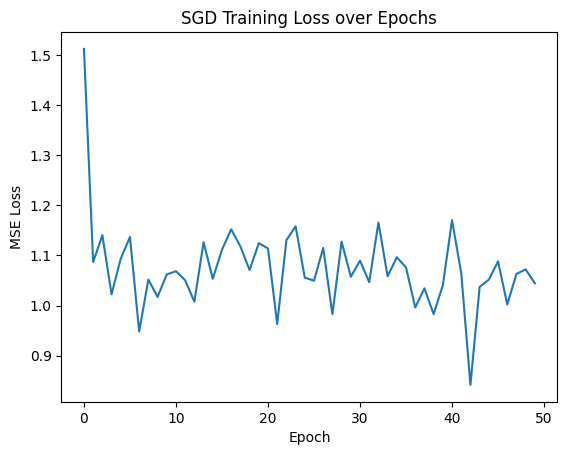

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Recreate synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# SGD parameters
lr = 0.1  # learning rate
epochs = 50
w = np.random.randn(1)  # weight
b = np.random.randn(1)  # bias
losses = []

for epoch in range(epochs):
    # Shuffle data each epoch
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    epoch_loss = 0
    for i in range(X.shape[0]):
        xi = X_shuffled[i]
        yi = y_shuffled[i]

        # Prediction
        y_pred = w * xi + b

        # Error
        error = y_pred - yi

        # Gradients
        dw = 2 * xi * error
        db = 2 * error

        # Parameter update
        w -= lr * dw
        b -= lr * db

        # Track loss (MSE for this sample)
        epoch_loss += error**2

    # Average loss for the epoch
    losses.append(epoch_loss / X.shape[0])

# Final parameters
print(f"Learned parameters: w = {w[0]:.4f}, b = {b[0]:.4f}")

# Plot loss curve
plt.plot(losses)
plt.title('SGD Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

### Explanation
- **Learning rate (lr)** controls how big each step in gradient descent is.
- **Weight (w)** and **bias (b)** are initialized randomly and refined over time.
- Each epoch goes through the entire dataset, but **SGD** updates weights after **each sample**.
- Shuffling prevents cycles and ensures better convergence.
- Loss curve should **decrease smoothly** if the learning rate is reasonable.
- The final parameters should be close to the true generating model (~3 for weight, ~4 for bias).

## Bonus: Mini-Batch Gradient Descent

SGD can be noisy since it updates after each single point.
Mini-batch GD updates after a small batch (e.g., 10 samples).
This balances computational efficiency and stable convergence.

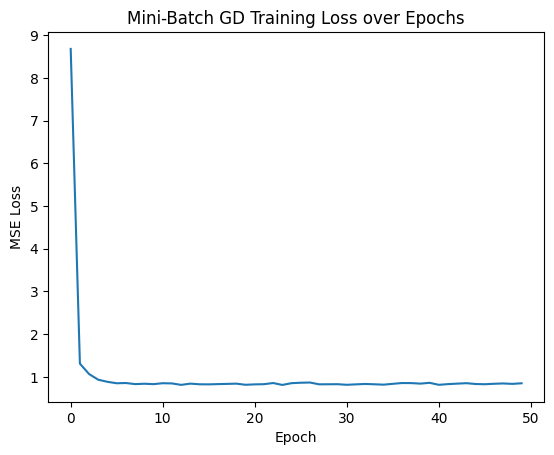

In [2]:
# Mini-batch implementation
batch_size = 10
w = np.random.randn(1)
b = np.random.randn(1)
losses_mb = []

for epoch in range(epochs):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    epoch_loss = 0
    for start in range(0, X.shape[0], batch_size):
        end = start + batch_size
        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        y_pred = w * X_batch + b
        error = y_pred - y_batch

        dw = (2 / batch_size) * np.sum(X_batch * error)
        db = (2 / batch_size) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        epoch_loss += np.mean(error**2)

    losses_mb.append(epoch_loss / (X.shape[0] / batch_size))

# Plot mini-batch loss curve
plt.plot(losses_mb)
plt.title('Mini-Batch GD Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()